# HOG Features

## Libraries

In [1]:

import pandas as pd
import os
from tqdm import tqdm
import numpy as np
from skimage.feature import hog
import cv2
import matplotlib.pyplot as plt


## Functions

In [2]:

def print_image(img, title=""):
    # plt.figure()
    plt.imshow(img, cmap="gray")    
    plt.xticks([])
    plt.yticks([])
    
    if(title==""):
        plt.title(f"Img - {img.shape}")
    else:
        plt.title(title)
    
    # plt.show()


## Test extraction

In [4]:
db_path = "../../Datasets/Objects_Database/"

selected_data_file = os.path.join(db_path,"2_Selected_Objects_Information.csv")
selected_data_df = pd.read_csv(selected_data_file)
selected_data_df.head()

,image_name,docid,label,x,y,w,h,logo_label,set
0,aex05f00_2,aex05f00_2_obj2.png,other,297,208,546,46,0,train
1,hpz95d00,hpz95d00_obj0.png,logo,758,222,190,239,10,train
2,hpz95d00,hpz95d00_obj3.png,signature,927,1156,350,252,0,train
3,azx34c00-page02_2,azx34c00-page02_2_obj1.png,other,330,688,510,94,0,train
4,azx34c00-page02_2,azx34c00-page02_2_obj2.png,signature,892,471,359,212,0,train


100%|██████████| 3/3 [00:00<00:00, 59.67it/s]


other
../../Datasets/Objects_Database/other/api68d00_obj0.png
logo
../../Datasets/Objects_Database/logo/bjn43c00-page02_2_obj4.png
other
../../Datasets/Objects_Database/other/gmk15f00_obj2.png


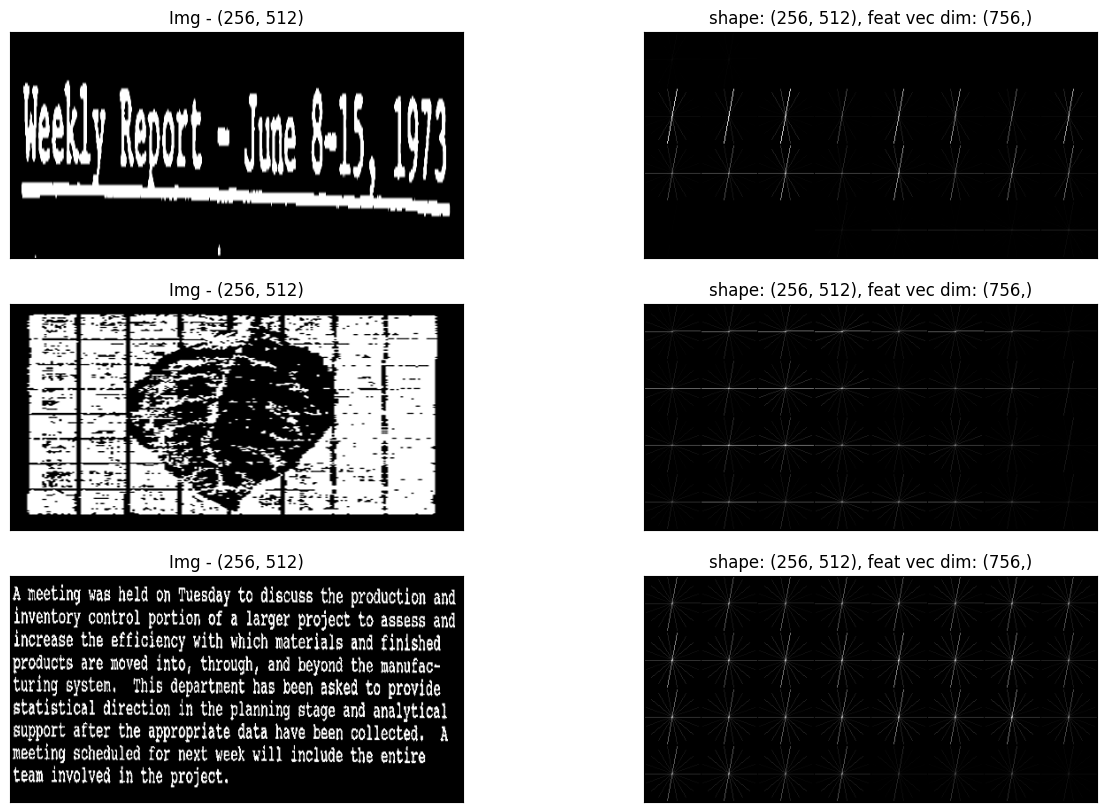

In [7]:


fig = plt.figure(figsize=(15,10))
g = 1


for i in tqdm([50, 250, 500]):

    image_file = os.path.join(db_path, selected_data_df.loc[i, "label"], selected_data_df.loc[i, "docid"])

    print(selected_data_df.loc[i, "label"])
    print(image_file)

    #### Load image ###
    image = cv2.imread(image_file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #### Reshape image #### 
    dim = (512, 256)
    image = cv2.resize(image, dim, interpolation=cv2.INTER_CUBIC)

    orientations = 9
    px_cell = 64
    cell_block = 2
    block_norm = "L2-Hys"

    hog_vec, hog_image = hog(image, orientations=orientations, pixels_per_cell=(px_cell, px_cell),
                            cells_per_block=(cell_block, cell_block), block_norm=block_norm, visualize=True)

    
    plt.subplot(3,2,g)
    print_image(image)
    g += 1

    plt.subplot(3,2,g)
    print_image(hog_image, title=f"shape: {hog_image.shape}, feat vec dim: {hog_vec.shape}")
    g += 1





features_name = f"Information/Features({hog_vec.shape[0]})_HOG_img{image.shape}_Orientations({orientations})_Cell({px_cell})_Block({cell_block})_Norm({block_norm}).pdf"
save_file = os.path.join(db_path, features_name)
plt.savefig(save_file)
plt.show()



In [ ]:
type(hog_vec)

numpy.ndarray

## Feature Extraction By document

In [3]:
#### path of the segmented images ####
db_path = "../../Datasets/Objects_Database/"

#### File of selected data ####
selected_data_file = os.path.join(db_path,"2_Selected_Objects_Information.csv")
selected_data_df = pd.read_csv(selected_data_file)
selected_data_df.head()



#### HOG Parameters ####
dim = (512, 256)
orientations = 9
pixels_per_cell = 64
cells_per_block = 2
block_norm = "L2-Hys"

feature_list = []

for i in tqdm(range(len(selected_data_df))):

    ## Merge image path ##
    image_file = os.path.join(db_path, selected_data_df.loc[i, "label"], selected_data_df.loc[i, "docid"])
    # print(selected_data_df.loc[i, "label"])
    # print(image_file)

    #### Load image ###
    image = cv2.imread(image_file)
    #### Conver to gray sacale ####
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    #### Reshape image #### 
    image = cv2.resize(image, dim, interpolation=cv2.INTER_CUBIC)

    #### HOG feature extraction ####
    hog_vec = hog(image, orientations=orientations, pixels_per_cell=(pixels_per_cell, pixels_per_cell),
                            cells_per_block=(cells_per_block, cells_per_block), block_norm=block_norm, visualize=False)

    #### Save features ####
    feature_list.append(hog_vec)
    
    # break

#### Convert list to DF ####
feature_list = np.asarray(feature_list)
col_name = [f"hog_{i}" for i in range(feature_list.shape[1])]
features_df = pd.DataFrame(np.asarray(feature_list), columns=col_name)
#### Concat feature information ####
features_df = pd.concat([selected_data_df, features_df], axis=1)

features_name = f"Features/HOG_Feat({hog_vec.shape[0]})_img{image.shape}_O({orientations})_C({pixels_per_cell})_B({cells_per_block})_N({block_norm}).csv"

features_file = os.path.join(db_path, features_name)

print("\n\nSaving features...")
features_df.to_csv(features_file, index=False)



100%|██████████| 636/636 [00:02<00:00, 216.07it/s]




Saving features...


## Feature Ectraction By Folder

In [ ]:
## Path to save features ##
save_path = "data/2nd_Experiments_HOG_SVM_Nonsense_Img/Features/"

## Images path ##
data_path = "data/2nd_Experiments_HOG_SVM_Nonsense_Img/Images/"

dir_list = os.listdir(data_path)

#### Feature Extraction Parameters ####
dim = (512, 256)
orientations = 9
pixels_per_cell = 64
cells_per_block = 2
block_norm = "L2-Hys"

feature_list = []

## Lists to save information ##
dir_l = []
label_l = []
docid_l = []

for dir in (dir_list):
    
    label_path = os.path.join(data_path, dir)
    label_list = os.listdir(label_path)

    for label in (label_list):
        
        img_path = os.path.join(label_path, label)
        img_list = os.listdir(img_path)

        for img in tqdm(img_list):

            img_file = os.path.join(img_path, img)

            #### Load image ###
            image = cv2.imread(img_file)
            #### Conver to gray sacale ####
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            #### Reshape image #### 
            image = cv2.resize(image, dim, interpolation=cv2.INTER_CUBIC)

            #### HOG feature extraction ####
            hog_vec = hog(image, orientations=orientations, pixels_per_cell=(pixels_per_cell, pixels_per_cell),
                                    cells_per_block=(cells_per_block, cells_per_block), block_norm=block_norm, visualize=False)

            #### Save features ####
            feature_list.append(hog_vec)

            #### Save information ####
            dir_l.append(dir)
            label_l.append(label)
            docid_l.append(img)

## Load annotations file ##
annotations_file = "data/logo_annotations_2.csv"
annotations_df = pd.read_csv(annotations_file)
annotations_df.index = list(annotations_df["docid"])

## build DF with the information ##
selected_data_df = pd.DataFrame([])
selected_data_df["docid"] = docid_l
selected_data_df["set"] = dir_l
selected_data_df["label"] = label_l
selected_data_df["label1"] = list(annotations_df.loc[docid_l,"label1"])


#### Convert list of features to DF ####
features_df = pd.DataFrame(np.asarray(feature_list))
#### Concat feature information ####
features_df = pd.concat([selected_data_df, features_df], axis=1)

## Construct feature file ##
features_name = f"HOG_Train_Test_F({hog_vec.shape[0]})_img{image.shape}_O({orientations})_C({pixels_per_cell})_B({cells_per_block})_N({block_norm}).csv"
features_file = os.path.join(save_path, features_name)


print("\n\nSaving features...")
features_df.to_csv(features_file, index=False)

print(features_df.shape)
features_df.head()


  5%|▌         | 2/40 [00:00<00:02, 17.13it/s]

100%|██████████| 164/164 [00:16<00:00, 10.18it/s]




Saving features...
(612, 760)


,docid,set,label,label1,0,1,2,3,4,5,...,746,747,748,749,750,751,752,753,754,755
0,asg54f00_obj0.png,test,logo,l4,0.165322,0.021259,0.026590,0.046260,0.237287,0.027919,...,0.078893,0.182369,0.024934,0.043642,0.072209,0.334180,0.040899,0.022089,0.023258,0.035250
1,asg54f00_obj1.png,test,logo,l4,0.210339,0.004926,0.006139,0.016645,0.360564,0.009125,...,0.068066,0.127165,0.024646,0.040324,0.073860,0.338945,0.081878,0.054569,0.018047,0.063622
2,asg54f00_obj2.png,test,logo,l4,0.327109,0.005079,0.004648,0.011043,0.191620,0.020315,...,0.086635,0.306163,0.036134,0.059010,0.090156,0.282355,0.062831,0.048608,0.023399,0.093901
3,asg54f00_obj3.png,test,logo,l4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.152555,0.317194,0.009011,0.027747,0.038205,0.317194,0.025299,0.030114,0.001742,0.025115
4,asg54f00_obj4.png,test,logo,l4,0.349066,0.004625,0.024987,0.031090,0.181821,0.023265,...,0.176941,0.321010,0.015139,0.010436,0.024060,0.190418,0.016864,0.013015,0.006860,0.035634


In [ ]:
## Construct feature file ##
features_name = f"HOG_Train_Test_F({hog_vec.shape[0]})_img{image.shape}_O({orientations})_C({pixels_per_cell})_B({cells_per_block})_N({block_norm}).csv"
features_file = os.path.join(save_path, features_name)


print("\n\nSaving features...")
features_df.to_csv(features_file, index=False)



Saving features...
